# Análise de dados em Oferta de imóveis residenciais para locação no Brasil. 

Dataset público do Kaggle com 10.692 Imóveis em 5 cidades diferentes. Atualizado em Maio de 2020 


In [2]:
#Instalamos o pacote para manejar visualmente dados faltantes 
pip install missingno

SyntaxError: invalid syntax (<ipython-input-2-d1758c90a116>, line 2)

In [3]:
#importamos as principais biblitecas para esta analise 

import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

Fazemos o Download do dataset e carregamento em um Pandas Dataframe 

In [4]:
df = pd.read_csv('houses_to_rent_v2.csv',sep=',')

Aqui fazemos uma checagem amostral dos dados, para checar se existe alguma inconsistencia em nome de coluna, quais sao as informações que dispomos e etc

In [5]:
df.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


Percebendo que os nomes estão em inglês, podemos trocar para Português e checar se os valores estão em formato apropriado para análise.

In [6]:
colunas = ['Cidade','Area','Quartos','Banheiros','Vaga_estac','Andar',
           'Permite_pet','Mobilia','hoa (R$)','Aluguel','Condominio',
           'Seguro_incendio','total (R$)']

df.columns = colunas

In [7]:
print(df.dtypes)

Cidade             object
Area                int64
Quartos             int64
Banheiros           int64
Vaga_estac          int64
Andar              object
Permite_pet        object
Mobilia            object
hoa (R$)            int64
Aluguel             int64
Condominio          int64
Seguro_incendio     int64
total (R$)          int64
dtype: object


Existem alguns dados categorios, vamos analisar mais afundo

In [8]:
for i in df.columns:
    x = df[i].value_counts()
    print("Nome da variável:",i,"\nContagem de valores:",'\n',x)
    print()

Nome da variável: Cidade 
Contagem de valores: 
 São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: Cidade, dtype: int64

Nome da variável: Area 
Contagem de valores: 
 50     334
70     329
60     297
100    253
80     253
      ... 
434      1
418      1
394      1
354      1
458      1
Name: Area, Length: 517, dtype: int64

Nome da variável: Quartos 
Contagem de valores: 
 3     3269
2     2975
1     2454
4     1586
5      288
6       68
7       36
8       11
10       3
13       1
9        1
Name: Quartos, dtype: int64

Nome da variável: Banheiros 
Contagem de valores: 
 1     4301
2     2910
3     1474
4     1111
5      578
6      215
7       85
8       11
9        4
10       3
Name: Banheiros, dtype: int64

Nome da variável: Vaga_estac 
Contagem de valores: 
 1     3630
0     2683
2     2070
3      968
4      789
5      230
6      163
8      123
7       33
10       2
12       1
Name: Vaga_estac, dtype: int64

No

In [9]:
df.describe()

,Area,Quartos,Banheiros,Vaga_estac,hoa (R$),Aluguel,Condominio,Seguro_incendio,total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [10]:
df.describe(include = ['object'])

,Cidade,Andar,Permite_pet,Mobilia
count,10692,10692,10692,10692
unique,5,35,2,2
top,São Paulo,-,acept,not furnished
freq,5887,2461,8316,8086


In [11]:
df['Cidade'].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: Cidade, dtype: int64

Checamos que existem imoveis em 5 cidades diferentes, onde São Paulo possui a maior incidência de Imóveis


A maior parte dos imóveis é de 2 ou 3 quartos, em média 2 banheiros, 1 vaga de garagem. Aceita Pet e não é mobiliado

Percebendo que as duas variáveis categóricas [Permite_Pet] e [Mobilia] são objetos do tipo texto, 
vamos também traduzi-las para Português. 


In [12]:
df = df.replace(to_replace = 'acept',value = 'sim')
df = df.replace(to_replace = 'not acept',value = 'nao')
df = df.replace(to_replace = 'furnished',value = 'sim')
df = df.replace(to_replace = 'not furnished',value = 'nao')

In [13]:
df.head()

,Cidade,Area,Quartos,Banheiros,Vaga_estac,Andar,Permite_pet,Mobilia,hoa (R$),Aluguel,Condominio,Seguro_incendio,total (R$)
0,São Paulo,70,2,1,1,7,sim,sim,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,sim,nao,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,sim,nao,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,sim,nao,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,nao,nao,0,800,25,11,836


Antes de aplicar análises mais profundas, vamos checar se existem valores nulos. Em caso de, as barras ficariam falhadas, como um código de barras, indicando o local do N/A 


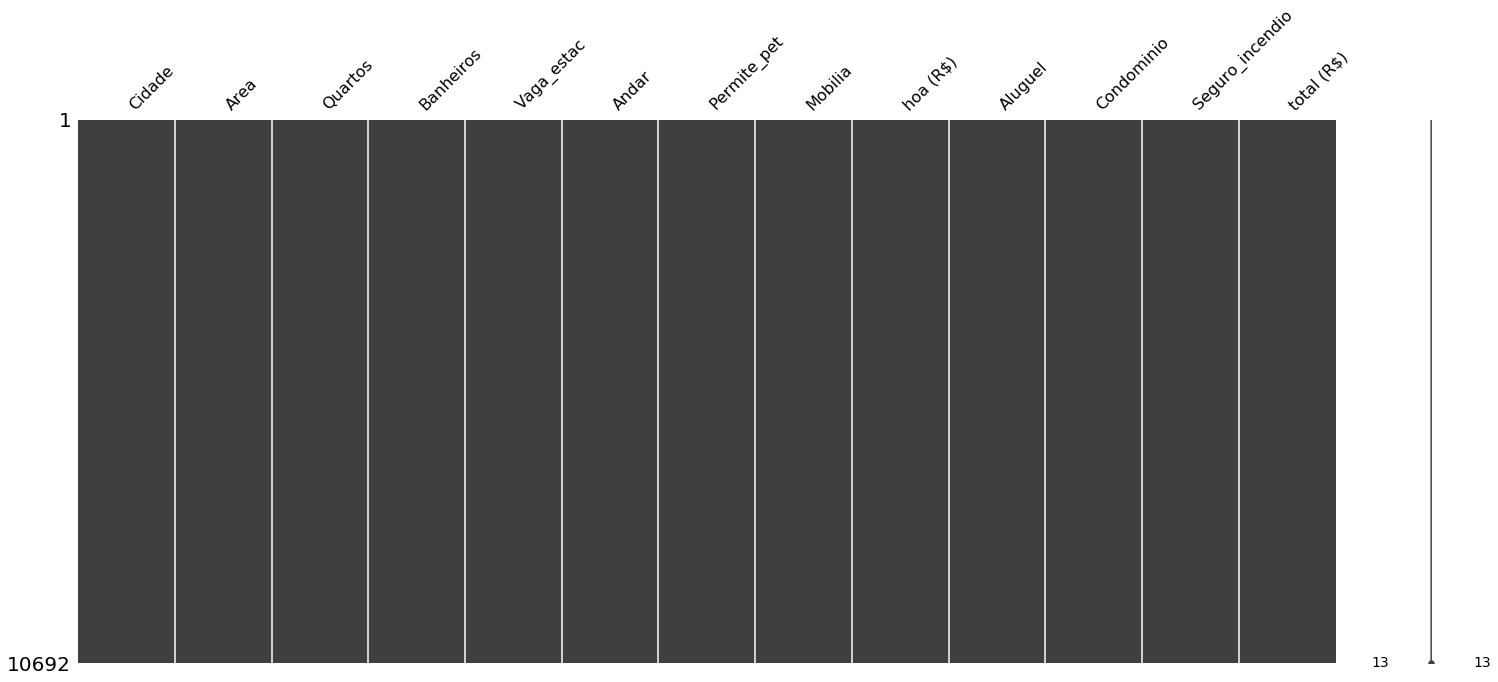

In [14]:
msno.matrix(df)

Como o dataset está completo e sem dados faltantes. Vamos aplicar algumas análises extras. As duas variáveis categóricas permite_pet e mobilia, por hora iremos manter como texto para fins de visualização, na segunda etapa faremos a normalização para criar um modelo preditivo para o valor de aluguel

Conforme checado anteriormente, o valor de Desvio padrão para Area do Imóvel, Aluguel e Condomínio tem discrepancias absurdas. Provavelmente indicando que existem diferentes categorias de imóveis, ou outliers extremos. Podemos no tar no boxplot abaixo, que o Aluguel dos Imóveis varia muito entre apartamentos com até 4 quartos

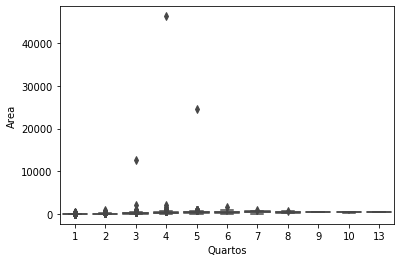

In [15]:
sns.boxplot(x="Quartos", y="Area", data=df)

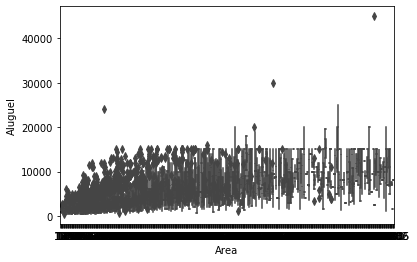

In [16]:
sns.boxplot(x="Area", y="Aluguel", data=df)

Podemos observar que existe uma grande disparidade no preço do Aluguel. Além de ter um Desvio Padrão alto para Area e Aluguel. Vamos calcular uma métrica que não estava presente no dataset. Que é o preço do Aluguel por m2. E considerar ela na exploração posterior

Podemos perceber que existem imóveis no banco de dados com mais de 10.000m2. Isso da a entender que exitem no dataset imóveis não residenciais. Como este é o intuito. vamos considerar apenas os residenciais

In [17]:
df['preco_m2'] = df['Aluguel'] / df['Area']

In [73]:
df = df[df.Area < 350]


Vamos checar como ficou a distribuição dos Imóveis por Metragem

Text(0.5, 1.0, 'Histograma de Area dos Imoveis')

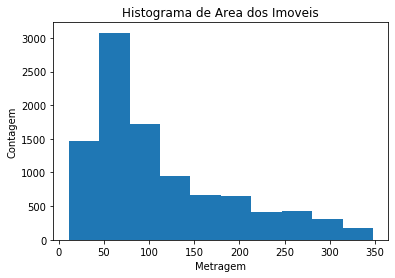

In [74]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Area"])

# set x/y labels and plot title
plt.pyplot.xlabel("Metragem")
plt.pyplot.ylabel("Contagem")
plt.pyplot.title("Histograma de Area dos Imoveis")

Abaixo podemos observar que imóveis com até 4 quartos tem uma grande variancia de preço, talvez o fato de o apartamento ser Mobiliado ?
Podemos perceber abaixo, que o Mobiliado, é 74% mais caro

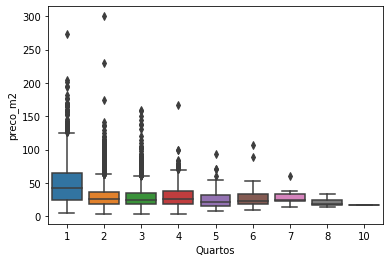

In [75]:
sns.boxplot(x="Quartos", y="preco_m2", data=df)

In [109]:
df_grupo1 = df[['Mobilia','preco_m2']]
grouped_mobilia = df_grupo1.groupby(['Mobilia'],as_index=False).mean()
grouped_mobilia

,Mobilia,preco_m2
0,nao,29.736299
1,sim,49.429231


Vamos analisar mais a fundo a questão da Mobilia, considerando a Quantidade de Quartos e a cidade

In [110]:
df_grupo2 = df[['Cidade','Quartos','Mobilia','preco_m2']]
grouped_quartos = df_grupo2.groupby(['Cidade','Quartos','Mobilia'],as_index=False).mean()
grouped_quartos
  

,Cidade,Quartos,Mobilia,preco_m2
0,Belo Horizonte,1,nao,33.873863
1,Belo Horizonte,1,sim,48.893738
2,Belo Horizonte,2,nao,21.141827
3,Belo Horizonte,2,sim,29.498540
4,Belo Horizonte,3,nao,20.477453
...,...,...,...,...
57,São Paulo,5,sim,24.594064
58,São Paulo,6,nao,33.888183
59,São Paulo,7,nao,31.500000
60,São Paulo,7,sim,24.000000


Vamos analisar um comparativo para encontra a relação entre Cidade e o fato de o Apartamento ser Mobiliado. 

In [111]:
df_grupo3 = df[['Cidade','Mobilia','preco_m2']]
grouped_cidade = df_grupo3.groupby(['Cidade','Mobilia'],as_index=False).mean()
grouped_cidade

,Cidade,Mobilia,preco_m2
0,Belo Horizonte,nao,23.242083
1,Belo Horizonte,sim,36.293163
2,Campinas,nao,19.739288
3,Campinas,sim,33.321091
4,Porto Alegre,nao,23.609452
5,Porto Alegre,sim,32.589430
6,Rio de Janeiro,nao,30.448724
7,Rio de Janeiro,sim,48.711653
8,São Paulo,nao,34.268584
9,São Paulo,sim,55.543665


In [112]:
sem_mobilia = grouped_cidade.loc[grouped_cidade['Mobilia'] == 'nao']
sem_mobilia.reset_index(inplace=True, drop=True)

com_mobilia = grouped_cidade.loc[grouped_cidade['Mobilia'] == 'sim']
com_mobilia.reset_index(inplace=True, drop=True)

diff = (com_mobilia['preco_m2'] / sem_mobilia['preco_m2'] - 1 ) *100

diff.mean()

57.01137711524835

Podemos checar que os apartamentos mobiliados são em média 57% mais caros do que sem mobilia. Iremos transformar a tabela em um Pivot para plotar um mapa de calor

In [80]:
grouped_pivot = grouped_cidade.pivot(index='Cidade',columns='Mobilia')
grouped_pivot

preco_m2           
Mobilia               nao        sim
Cidade                              
Belo Horizonte  23.242083  36.293163
Campinas        19.739288  33.321091
Porto Alegre    23.609452  32.589430
Rio de Janeiro  30.448724  48.711653
São Paulo       34.268584  55.543665

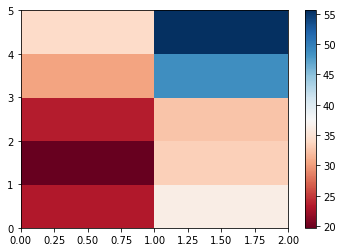

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

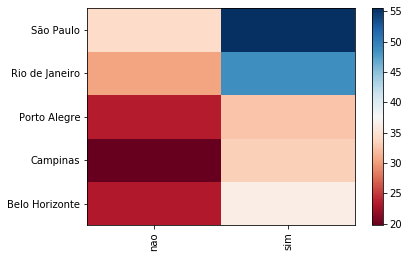

In [82]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

# Podemos perceber que m2 mais caro está em São Paulo, e Rio de Janeiro, e a Mobilia deixa o Imovel em média 57% mais caro. Mas ainda não é o suficiente, vamos para mais análises

Vamos agora criar uma outra análise, observar se a quantidade de banheiros do Imovel impacta no preço do Aluguel. E se isso tem alguma relação com a localização

In [83]:
df_grupo4 = df[['Cidade','Banheiros','Mobilia','preco_m2']]
grouped_teste = df_grupo4.groupby(['Cidade','Banheiros'],as_index=False).mean()
grouped_teste.head(10)

,Cidade,Banheiros,preco_m2
0,Belo Horizonte,1,25.410464
1,Belo Horizonte,2,22.554157
2,Belo Horizonte,3,24.354774
3,Belo Horizonte,4,30.085237
4,Belo Horizonte,5,33.913786
5,Belo Horizonte,6,30.785226
6,Belo Horizonte,7,11.991342
7,Campinas,1,20.970409
8,Campinas,2,21.198576
9,Campinas,3,23.376374


In [84]:
grouped_pivot4 = grouped_teste.pivot(index='Cidade',columns='Banheiros')
grouped_pivot4

preco_m2                                              \
Banheiros               1          2          3          4          5   
Cidade                                                                  
Belo Horizonte  25.410464  22.554157  24.354774  30.085237  33.913786   
Campinas        20.970409  21.198576  23.376374  21.923506  26.396792   
Porto Alegre    25.904347  25.962186  25.780566  25.983254  29.030227   
Rio de Janeiro  37.388552  33.023030  33.329752  34.466010  42.126595   
São Paulo       47.748097  37.448021  34.286618  33.181734  34.019721   

                                                 
Banheiros               6          7          8  
Cidade                                           
Belo Horizonte  30.785226  11.991342        NaN  
Campinas        23.202537  32.786885        NaN  
Porto Alegre    41.670825  12.883436        NaN  
Rio de Janeiro  31.404483        NaN        NaN  
São Paulo       28.185577  38.703231  36.333333

In [85]:
grouped_pivot4 = grouped_pivot4.fillna(0) 
grouped_pivot4

preco_m2                                              \
Banheiros               1          2          3          4          5   
Cidade                                                                  
Belo Horizonte  25.410464  22.554157  24.354774  30.085237  33.913786   
Campinas        20.970409  21.198576  23.376374  21.923506  26.396792   
Porto Alegre    25.904347  25.962186  25.780566  25.983254  29.030227   
Rio de Janeiro  37.388552  33.023030  33.329752  34.466010  42.126595   
São Paulo       47.748097  37.448021  34.286618  33.181734  34.019721   

                                                 
Banheiros               6          7          8  
Cidade                                           
Belo Horizonte  30.785226  11.991342   0.000000  
Campinas        23.202537  32.786885   0.000000  
Porto Alegre    41.670825  12.883436   0.000000  
Rio de Janeiro  31.404483   0.000000   0.000000  
São Paulo       28.185577  38.703231  36.333333

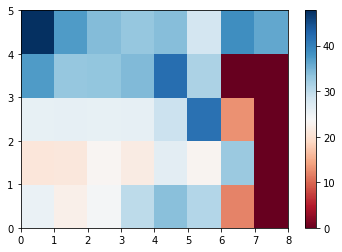

In [86]:
plt.pcolor(grouped_pivot4, cmap='RdBu')
plt.colorbar()
plt.show()

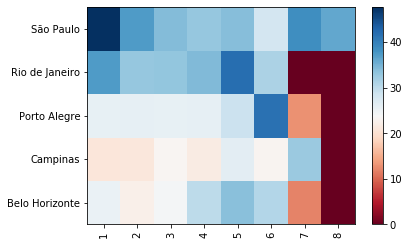

In [87]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot4, cmap='RdBu')

#Labels
row_labels = grouped_pivot4.columns.levels[1]
col_labels = grouped_pivot4.index

#Colocar o label no centro 
ax.set_xticks(np.arange(grouped_pivot4.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot4.shape[0]) + 0.5, minor=False)

#Inserir os labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#Girar se for muito longo
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

# A análise indica que os apartamentos em SP com até 2 banheiros tem os valores mais elevados de Aluguel.  Rio de Janeiro e Porto Alegre tem preços mais elevados quando a quantidade de Banheiros atinge mais de 5

Uma outra técnica não utilizada anteriormente, é fazer o "Binning" de dados. Iremos categorizar o tamanho do Imóvel de acordo com sua metragem quadrada. Essa informação será útil na segunda parte da análise

Vamos separar os imóveis em 3 grupos. Pequeno, Médio e Grande

In [113]:
bins = np.linspace(min(df["Area"]), max(df["Area"]), 4)
bins

array([ 11.        , 123.33333333, 235.66666667, 348.        ])

In [114]:
group_names = ['Pequeno', 'Medio', 'Grande']

In [115]:
df['Area-Binned'] = pd.cut(df['Area'], bins, labels=group_names, include_lowest=True )
df[['Area','Area-Binned']].head(10)

/Users/robsonmuller/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Area,Area-Binned
0,70,Pequeno
1,320,Grande
2,80,Pequeno
3,51,Pequeno
4,25,Pequeno
6,72,Pequeno
7,213,Medio
8,152,Medio
9,35,Pequeno
10,26,Pequeno


Vamos checar como ficou a distribuição

Text(0.5, 1.0, 'Imóveis por Tamanho')

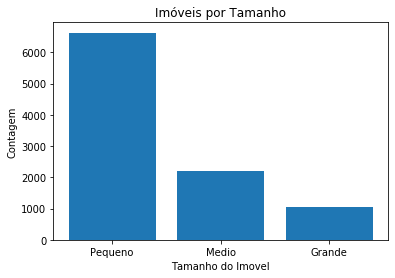

In [116]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["Area-Binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Tamanho do Imovel")
plt.pyplot.ylabel("Contagem")
plt.pyplot.title("Imóveis por Tamanho")

Por curiosidade, vamos checar como fica a variação do aluguel, de acordo com o agrupamento de tamanho do Imóvel, para isso usamos o boxplot da biblioteca Seaborn. 

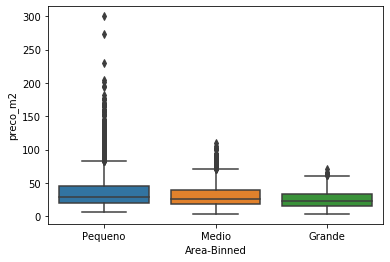

In [117]:
sns.boxplot(x="Area-Binned", y="preco_m2", data=df)

Notamos que existe algo deixando os apartamentos pequenos caros (Aqui na nossa análise, aqueles até 170m2) Usando a função de correlação vamos observar que outros fatores tem lineariedade com o valor do aluguel.

In [118]:
df.corr()

,Area,Quartos,Banheiros,Vaga_estac,hoa (R$),Aluguel,Condominio,Seguro_incendio,total (R$),preco_m2
Area,1.000000,0.747813,0.775807,0.672784,0.040072,0.651301,0.066485,0.674050,0.164200,-0.242214
Quartos,0.747813,1.000000,0.698183,0.582340,0.006423,0.474992,0.044194,0.494888,0.097142,-0.286626
Banheiros,0.775807,0.698183,1.000000,0.663166,0.056185,0.621024,0.071626,0.624476,0.175270,-0.093779
Vaga_estac,0.672784,0.582340,0.663166,1.000000,0.008840,0.520997,0.061947,0.534005,0.110787,-0.082507
hoa (R$),0.040072,0.006423,0.056185,0.008840,1.000000,0.039043,0.005738,0.034216,0.964232,0.000924
Aluguel,0.651301,0.474992,0.621024,0.520997,0.039043,1.000000,0.069104,0.987625,0.224284,0.399244
Condominio,0.066485,0.044194,0.071626,0.061947,0.005738,0.069104,1.000000,0.066684,0.206025,0.014395
Seguro_incendio,0.674050,0.494888,0.624476,0.534005,0.034216,0.987625,0.066684,1.000000,0.217116,0.365424
total (R$),0.164200,0.097142,0.175270,0.110787,0.964232,0.224284,0.206025,0.217116,1.000000,0.072965
preco_m2,-0.242214,-0.286626,-0.093779,-0.082507,0.000924,0.399244,0.014395,0.365424,0.072965,1.000000


A correlação de Aluguel e Seguro Incendio é quase 1. Aqui não vamos tratar o fator P. Apenas observar a relação

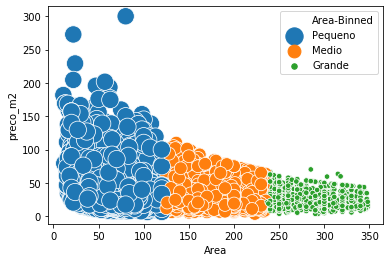

In [119]:
cmap = sns.cubehelix_palette(dark=.5, light=.20, as_cmap=True)
ax = sns.scatterplot(x="Area", y="preco_m2",
                      hue="Area-Binned", size="Area-Binned",
                      sizes=(30, 300), hue_norm=(5, 10),
                      legend="full", data=df)

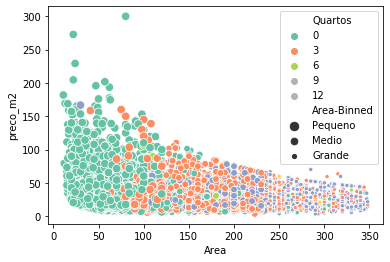

In [107]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="Area", y="preco_m2",
                      hue="Quartos", size="Area-Binned",
                      palette="Set2",
                      data=df
                        )

Podemos perceber que os Imóveis classificados como pequenos tem o preço por m2 consideravelmente mais elevado do que os imoveis maiores. Mas por quê? Cruzando com a quantidade de quartos. Percebemos que os imóveis com 0 quartos são os mais caros. Até então nos permitindo concluir que se tratam de imóveis Comerciais, ou provavelmente imóveis localizados em area central do tipo Studio

# Esta foi uma abordagem inicial neste dataset. No próximo notebook vou aplicar um modelo de regressão linear, efetuar normalização, padronização, checar a correlação de Pearson e montar um algoritmo para prever/estimar o valor de aluguel de acordo com as caracteristicas do imóvel.